<a href="https://colab.research.google.com/github/Deddedd11101/AI/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
df = pd.read_csv("/content/runaway.csv")

In [ ]:
df.head() 

In [ ]:
df.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print("----------------------------------")
    print(df[column].value_counts(dropna=False)) 
    print("==================================")

In [ ]:
features = df.drop('Churn',1) 
labels = df['Churn'] 
print(features.head())

   ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0            55            19.50    1026.35    Male                0   
1            72            25.85     1872.2    Male                0   
2             1            75.90       75.9    Male                0   
3            32            79.30       2570  Female                1   
4            60           115.25    6758.45  Female                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No       No             Yes                      No   
3        Yes       No             Yes                     Yes   
4        Yes      Yes             Yes                     Yes   

  HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                 No      No internet service  No internet service   
1                 No      No interne

<ipython-input-23-ad3b8c0b12ea>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = df.drop('Churn',1)


In [ ]:
missing_counts = features.isnull().sum()
missing_counts

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

                 ClientPeriod  MonthlySpending  IsSeniorCitizen
ClientPeriod            1.000            0.249            0.012
MonthlySpending         0.249            1.000            0.215
IsSeniorCitizen         0.012            0.215            1.000


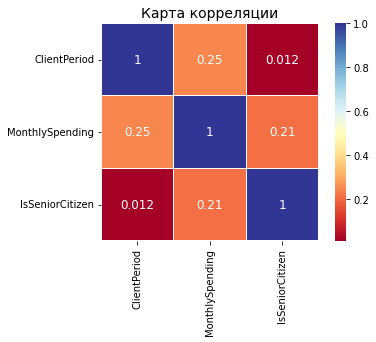

In [ ]:
var_corr = round(features.corr(),3)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 12, 'weight' : 'regular'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features[['ClientPeriod']]=scale_features_std.fit_transform(features[['ClientPeriod']]) 
print(features.head())

   ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0      0.920767            19.50    1026.35    Male                0   
1      1.613288            25.85     1872.2    Male                0   
2     -1.279005            75.90       75.9    Male                0   
3     -0.016173            79.30       2570  Female                1   
4      1.124450           115.25    6758.45  Female                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No       No             Yes                      No   
3        Yes       No             Yes                     Yes   
4        Yes      Yes             Yes                     Yes   

  HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                 No      No internet service  No internet service   
1                 No      No interne

In [ ]:
features["ClientPeriod"] = df["ClientPeriod"]
features['ClientPeriod'] = features['ClientPeriod'].fillna(features['ClientPeriod'].mean())
print(features.head())

from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features[["ClientPeriod"]] = scale_features_mm.fit_transform(features[["ClientPeriod"]]) 
print(features.head())

   ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0            55            19.50    1026.35    Male                0   
1            72            25.85     1872.2    Male                0   
2             1            75.90       75.9    Male                0   
3            32            79.30       2570  Female                1   
4            60           115.25    6758.45  Female                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No       No             Yes                      No   
3        Yes       No             Yes                     Yes   
4        Yes      Yes             Yes                     Yes   

  HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                 No      No internet service  No internet service   
1                 No      No interne

In [ ]:
from sklearn.model_selection import train_test_split 

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0) 

print(features.shape)
print(features_train.shape)
print(features_test.shape)

(5282, 19)
(4225, 19)
(1057, 19)
